In [1]:
import numpy as np

from numpy.random import rand
from scipy.integrate import odeint

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker

Local dimension and stability for Lorenz System.
Main code for computation of the metrics has been downloaded from Yoann Robin repository https://github.com/yrobink/CDSK/tree/master/python/CDSK . Thanks Yoann!

For a more insightful analysis of the Lorenz system using the local dimension and stability metrics, please give a look at the supplemental material of Davide's paper here: https://www.nature.com/articles/srep41278 

They run the system for way more time steps than we do and are able to recover the classical estimates of the average attractor dimension. In this notebook, we run it for way less time steps: the main point here is mainly to showcase these indicators. 

## Definition of the Lorenz system

In [2]:
# Lorenz system: https://en.wikipedia.org/wiki/Lorenz_system

# NOTE: Some of these functions where created during the class chaosbook.org

# global parameters (we know that for these parameters the system exhibits deterministic chaos)

G_sigma = 10.0
G_rho = 28.0
G_b = 8.0/3.0


def velocity(stateVec, t):
    """
    return the velocity field of Lorenz system.
    stateVec : the state vector in the full space. [x, y, z]
    t : time is used since odeint() requires it. 
    """
    
    x = stateVec[0]
    y = stateVec[1]
    z = stateVec[2]
    
    # Lorenz system
    vx = G_sigma*(y-x)
    vy = G_rho*x - y - x*z 
    vz = x*y - G_b*z 

    return np.array([vx, vy, vz])

def integrator(init_x, dt, nstp):
    """
    The integator of the Lorentz system.
    init_x: the intial condition
    dt : time step
    nstp: number of integration steps.
    
    return : a [ nstp x 3 ] vector 
    """

    state = odeint(velocity, init_x, np.arange(0, dt*nstp, dt))
    return state

In [3]:
# Run the system

# Random initial conditions
x0 = rand(3)
# Time step
dt = 0.05
# Total number of steps to integrate (time = 260 ---> number of steps == time/time_step)
nstp = 5000.0/dt
# Integrate the orbit
orbit = integrator(x0, dt, nstp)

In [4]:
# Size?
np.shape(orbit)

(100000, 3)

In [5]:
# Remove a (long) transient (ok not even a transient, just shortening by a lot the trajectory)
orbit = orbit[80000:]

In [6]:
# Size?
np.shape(orbit)

(20000, 3)

In [7]:
def plotFig(orbit):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(orbit[:,0], orbit[:,1], orbit[:,2],".b",linewidth = 0.5)
    ax.set_xlabel('X',fontsize = 18)
    ax.set_ylabel('Y',fontsize = 18)
    ax.set_zlabel('Z',fontsize = 18)
    plt.xlim(-25,25)
    plt.ylim(-25,25)
    ax.set_zlim(0,50)    
    ax.tick_params(labelsize=14)
    plt.show()

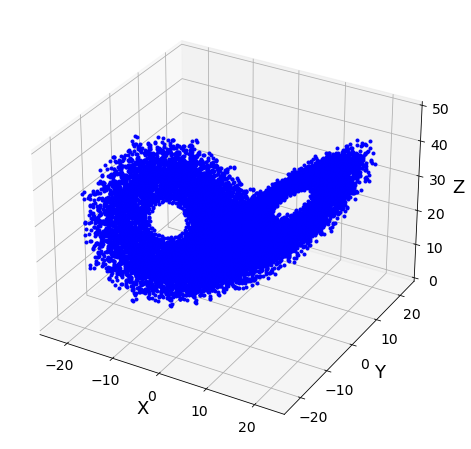

In [8]:
plotFig(orbit)
#fig.savefig('./figures/Lorenz_attactor.png',bbox_inches='tight') 

# Compute Local Dimension and Persistence

In [9]:
from metrics import *

In [10]:
# 20000 time steps
# 3 dimensional state space
np.shape(orbit)

(20000, 3)

In [11]:
X = orbit
localDim,theta = indicators( X , Y = None , metric = "euclidean" , q = 0.98 , n_jobs = 1 , pareto_fit = "scipy" , theta_fit = "sueveges" , distXY = None )

In [12]:
# The average value of all local dimensions inform on the average dimension of the attractor
# (and it is constrained on the number of temporal steps in the computation. Not so many in this case)
np.mean(localDim)

2.090613577102325

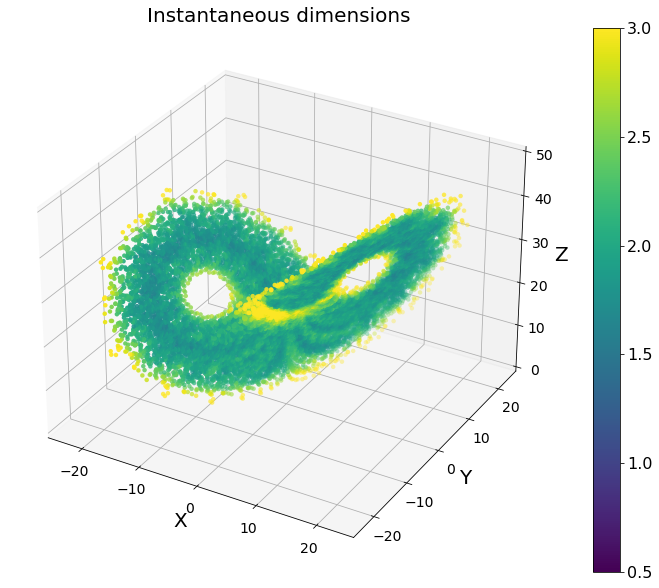

In [16]:
fig = plt.figure(figsize=(15,10))

# I need this for the colorbars

pointsize = 20
vmin = 0
vmax = 3

ax = fig.add_subplot(111, projection='3d')

cmap = mpl.cm.get_cmap('viridis')

s_plot = ax.scatter(orbit[:,0], orbit[:,1], orbit[:,2], 
                    c=localDim,cmap=cmap,marker = 'o',s = pointsize,linewidths=0,vmin = 0.5,vmax = 3)
#plt.plot(projected_embedding[:,0], projected_embedding[:,1],projected_embedding[:,2],c = 'k',linewidth = linewidth)
plt.title('Instantaneous dimensions',fontsize = 20)
ax.set_xlabel('X',fontsize = 20)
ax.set_ylabel('Y',fontsize = 20)
ax.set_zlabel('Z',fontsize = 20)
plt.xlim(-25,25)
plt.ylim(-25,25)
ax.set_zlim(0,50)
ax.tick_params(labelsize=14) 
ax.tick_params(labelsize=14) 
cb = fig.colorbar(s_plot,fraction=0.041, pad=0.05)
#cb.ax.set_yticklabels(['1980','1985','1990','1995','2000','2005','2010','2015'])
#cb.set_label(, rotation=90,fontsize = 20)
cb.ax.tick_params(labelsize=16) 
fig.savefig('./Dimension.png',bbox_inches='tight') 

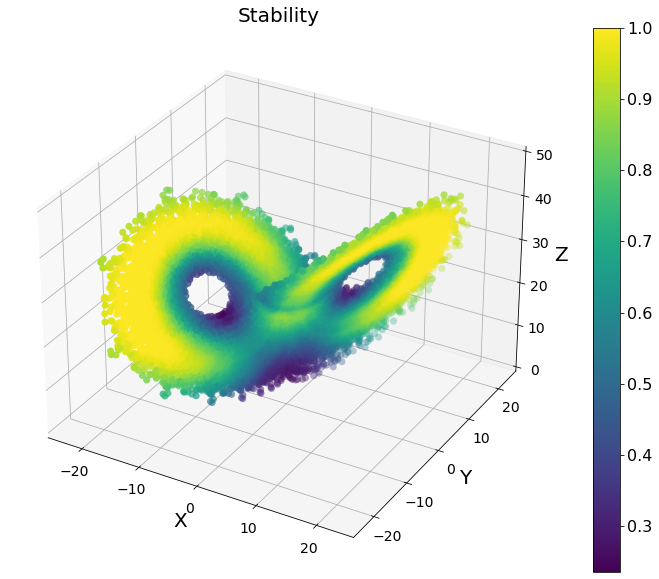

In [15]:
fig = plt.figure(figsize=(15,10))

# I need this for the colorbars

pointsize = 50

ax = fig.add_subplot(111, projection='3d')

cmap = mpl.cm.get_cmap('viridis')

s_plot = ax.scatter(orbit[:,0], orbit[:,1], orbit[:,2], 
                    c=theta,cmap=cmap,marker = 'o',s = pointsize,linewidths=0)
#plt.plot(projected_embedding[:,0], projected_embedding[:,1],projected_embedding[:,2],c = 'k',linewidth = linewidth)
plt.title('Stability',fontsize = 20)
ax.set_xlabel('X',fontsize = 20)
ax.set_ylabel('Y',fontsize = 20)
ax.set_zlabel('Z',fontsize = 20)
plt.xlim(-25,25)
plt.ylim(-25,25)
ax.set_zlim(0,50)
ax.tick_params(labelsize=14) 
ax.tick_params(labelsize=14) 
cb = fig.colorbar(s_plot,fraction=0.041, pad=0.05)
#cb.ax.set_yticklabels(['1980','1985','1990','1995','2000','2005','2010','2015'])
#cb.set_label(, rotation=90,fontsize = 20)
cb.ax.tick_params(labelsize=16) 
fig.savefig('./Stability_Lorenz.png',bbox_inches='tight') 